In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 93% 152M/163M [00:01<00:00, 146MB/s]
100% 163M/163M [00:01<00:00, 134MB/s]


In [5]:
from zipfile import ZipFile

dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("This Dataset is been Extracted ")

This Dataset is been Extracted 


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [7]:
# import the required libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir("/content/data/with_mask")

print(with_mask_files[:3])

['with_mask_2435.jpg', 'with_mask_2757.jpg', 'with_mask_3628.jpg']


In [9]:
without_mask_files = os.listdir("/content/data/without_mask")

print(without_mask_files[:3])

['without_mask_2299.jpg', 'without_mask_1367.jpg', 'without_mask_2164.jpg']


In [10]:
## checking the number of images present in the folder

print("Number of images with mask are ",len(with_mask_files))

Number of images with mask are  3725


In [11]:
## checking the number of images present in the folder

print("Number of images without mask are ",len(without_mask_files))

Number of images without mask are  3828


In [12]:
"""

mask ==> 1

without mask ==> 0

"""

'\n\nmask ==> 1\n\nwithout mask ==> 0\n\n'

In [13]:
## lets generate the labels for target class

with_mask_labels = [1] * 3725

without_mask_labels = [0] * 3828

In [14]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [15]:
with_mask_labels[:5],without_mask_labels[:5]

([1, 1, 1, 1, 1], [0, 0, 0, 0, 0])

In [16]:
# sun=mming up with mask and without mask

labels = with_mask_labels + without_mask_labels

In [17]:
len(labels)

7553

## How to display an images

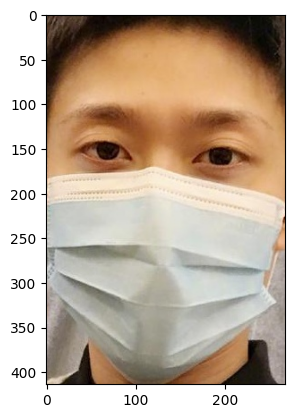

In [18]:
img = mpimg.imread("/content/data/with_mask/with_mask_1054.jpg")
imgplot = plt.imshow(img)
plt.show()

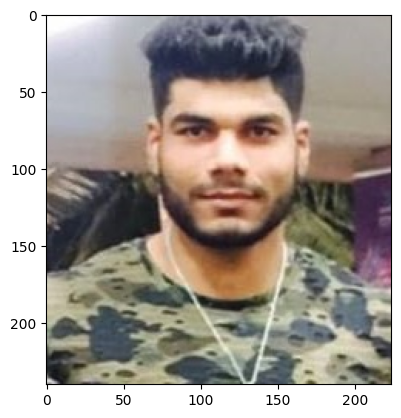

In [19]:
img = mpimg.imread("/content/data/without_mask/without_mask_1054.jpg")
imgplot = plt.imshow(img)
plt.show()

In [20]:
## resizing the image
# converting all the images in numpy array form

data = []

with_mask_path = "/content/data/with_mask/"

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file )
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)


without_mask_path = "/content/data/without_mask/"

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file )
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
len(data),len(labels)

(7553, 7553)

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
## conerting to array

x = np.array(data)

y = np.array(labels)

In [24]:
## lets do train test plit of dataset

x_train, x_test, y_train, y_test = train_test_split(
                                                    x,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 42
)

## Feature scaling

In [25]:
x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [26]:
x_train_scaled[0],x_train_scaled[0].shape

(array([[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.98431373, 0.98431373, 0.98431373],
         [1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843]],
 
        ...,
 
        [[0.99215686, 1.        , 0.98039216],
         [1.        , 0.99215686, 0.99215

In [27]:
# 2**24  rgb cha

In [28]:
# 2**8   rgb chan

In [29]:
# [255 255 255 ]   8 bit
# [16777215 16777215 16777215]   24 bit

In [30]:
## building an architeture

import tensorflow as tf
from tensorflow import keras

In [52]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(16,kernel_size = (3,3),activation = "relu",input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

# model.add(keras.layers.Conv2D(64,kernel_size = (3,3),activation = "relu"))
# model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation = "relu"))

model.add(keras.layers.Dense(64,activation = "relu"))

model.add(keras.layers.Dense(1,activation = "sigmoid"))

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 63504)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               8128640   
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                      

In [54]:
## lets compile the model

model.compile(
          optimizer = "adam",
          loss = "binary_crossentropy",
          metrics = ["accuracy"]
)

In [55]:
history = model.fit(
                x_train_scaled,
                y_train,
                validation_split = 0.2,
                epochs = 30,
                batch_size = 128
)

Epoch 1/30
38/38 [==============================] - 6s 71ms/step - loss: 0.6521 - accuracy: 0.6942 - val_loss: 0.3154 - val_accuracy: 0.8685
Epoch 2/30
38/38 [==============================] - 1s 36ms/step - loss: 0.2907 - accuracy: 0.8879 - val_loss: 0.2534 - val_accuracy: 0.9041
Epoch 3/30
38/38 [==============================] - 1s 36ms/step - loss: 0.1972 - accuracy: 0.9255 - val_loss: 0.2365 - val_accuracy: 0.9032
Epoch 4/30
38/38 [==============================] - 1s 32ms/step - loss: 0.1294 - accuracy: 0.9551 - val_loss: 0.2256 - val_accuracy: 0.9198
Epoch 5/30
38/38 [==============================] - 1s 36ms/step - loss: 0.0830 - accuracy: 0.9766 - val_loss: 0.2692 - val_accuracy: 0.9065
Epoch 6/30
38/38 [==============================] - 1s 32ms/step - loss: 0.0465 - accuracy: 0.9878 - val_loss: 0.2546 - val_accuracy: 0.9231
Epoch 7/30
38/38 [==============================] - 1s 32ms/step - loss: 0.0270 - accuracy: 0.9961 - val_loss: 0.2686 - val_accuracy: 0.9280
Epoch 8/30
38

In [56]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)

48/48 [==============================] - 0s 7ms/step - loss: 0.5156 - accuracy: 0.9107


In [57]:
loss,accuracy

(0.515579342842102, 0.9106552004814148)

In [58]:
def plotting(history,keyword):

  plt.plot(history.history[keyword])
  plt.plot(history.history["val_" + keyword])

  plt.title("model "+ keyword)
  plt.xlabel(keyword)
  plt.ylabel("epochs")

  plt.legend(["Training Data","Validation Data"])



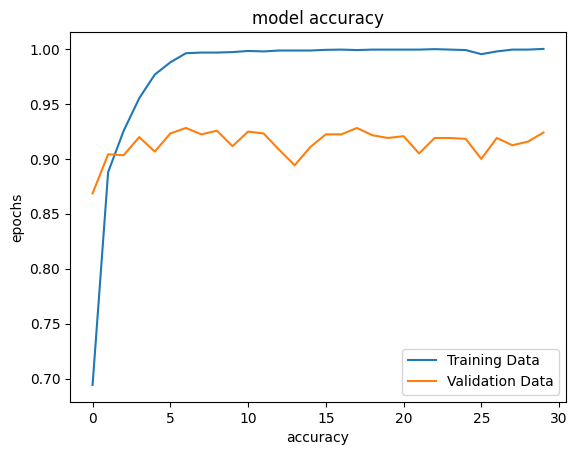

In [59]:
plotting(history,"accuracy")

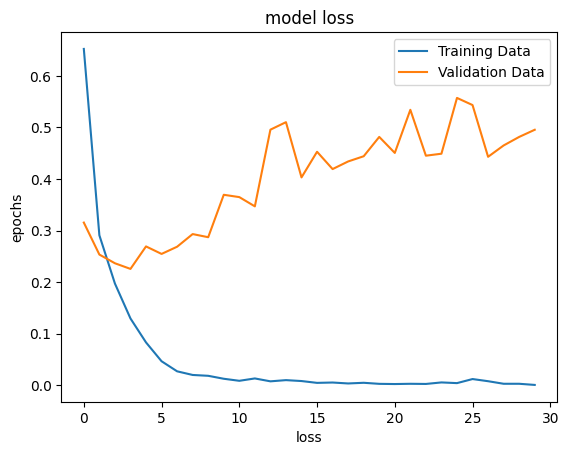

In [60]:
plotting(history,"loss")